In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from tqdm import tqdm
import torch
import numpy as np
from argparse import Namespace

from env.KREnvironment_WholeSession_GPU import KREnvironment_WholeSession_GPU

output_path = 'output/Kuairand_1K/env/log/'
uirm_log_path = output_path + 'user_KRMBUserResponse_lr0.0001_reg0.01_nlayer6.model.log'

slate_size = 6
max_step = 10
ep_batch_size = 16
initial_temper = max_step
rho = 0.1
args = eval(f"Namespace(uirm_log_path='{uirm_log_path}', slate_size={slate_size}, \
            max_step_per_episode={max_step}, episode_batch_size={ep_batch_size}, \
            initial_temper={initial_temper}, item_correlation={rho}, device='cpu')")

env = KREnvironment_WholeSession_GPU(args)

/opt/conda/envs/pt_rlsim/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Environment arguments: 
Namespace(attn_n_head=4, batch_size=128, cuda=0, data_separator=',', dropout_rate=0.1, enc_dim=64, epoch=10, item_latent_dim=32, item_meta_file='dataset/Kuairand-1K/video_features_basic_1K_fillna.csv', l2_coef=0.01, loss='bce', lr=0.0001, max_hist_seq_len=100, meta_file_sep=',', model_path='output/Kuairand_1K/env/user_KRMBUserResponse_lr0.0001_reg0.01_nlayer6.model', n_worker=4, save_with_val=False, scorer_hidden_dims=[128, 32], seed=619607, state_hidden_dims=[128], test_batch_size=128, test_file='', test_holdout_per_user=5, train_file='dataset/Kuairand-1K/log_session_4_08_to_5_08_1K.csv', transformer_d_forward=64, transformer_n_layer=6, user_latent_dim=32, user_meta_file='dataset/Kuairand-1K/user_features_1K_fillna.csv', val_batch_size=128, val_file='', val_holdout_per_user=5)
Loading raw data
Load user sequence reader
initiate KuaiRandMultiBehaior sequence reader
Loading data files
Load item meta data
Load user meta data
build vocab for onehot features


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 7716.66it/s]


build vocab for onehot features


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.44it/s]


build vocab for multihot features:
	tag


100%|███████████████████████████████████████████████████████████████████████████████████████████| 4371868/4371868 [00:02<00:00, 1688899.27it/s]


sequence holdout for users (-1, 0, 0)
{'raw_data_size': 1713050, 'data_size': [1713050, 0, 0], 'n_user': 997, 'n_item': 31698, 'max_seq_len': 100, 'user_features': ['user_active_degree', 'is_live_streamer', 'is_video_author', 'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat6', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11'], 'user_feature_dims': {'user_active_degree': 7, 'is_live_streamer': 2, 'is_video_author': 2, 'follow_user_num_range': 8, 'fans_user_num_range': 8, 'friend_user_num_range': 7, 'register_days_range': 7, 'onehot_feat0': 2, 'onehot_feat1': 7, 'onehot_feat6': 3, 'onehot_feat9': 7, 'onehot_feat10': 5, 'onehot_feat11': 3}, 'item_features': ['video_type', 'music_type', 'upload_type', 'tag'], 'item_feature_dims': {'video_type': 3, 'music_type': 7, 'upload_type': 32, 'tag': 59}, 'feedback_type': ['is_click', 'long_view', 'is_like', 'is_comment', 'is_forward', 'is_follow', 'is_hate'],

### User Profile and User History in the Observation Dict

In [3]:
from utils import show_batch, wrap_batch

observation = env.reset({'batch_size': ep_batch_size})
show_batch(env.current_observation['user_profile'])

user_id: size torch.Size([16]), 
	first 5 tensor([199, 300, 538,  75,  86])
uf_user_active_degree: size torch.Size([16, 7]), 
	first 5 tensor([[0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]])
uf_is_live_streamer: size torch.Size([16, 2]), 
	first 5 tensor([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
uf_is_video_author: size torch.Size([16, 2]), 
	first 5 tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])
uf_follow_user_num_range: size torch.Size([16, 8]), 
	first 5 tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]])
uf_fans_user_num_range: size torch.Size([16, 8]), 
	first 5 tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
    

In [4]:
from utils import show_batch, wrap_batch
show_batch(env.current_observation['user_history'])

history: size torch.Size([16, 100]), 
	first 5 tensor([[ 3610, 10691, 20929,  1014, 18937, 18553, 20124,  6851, 13088, 20177,
         10474,  6851,   927, 30750,  5221, 19876, 14156, 22976, 20875, 15661,
         20182, 30746, 13080,  9957,  6857,  5949, 13095, 11907, 21525,  5924,
         20108, 21234, 21234,  8569, 13024, 10397, 10560, 11121, 24742,  1083,
         31375, 23997, 20171,  6712,  5914, 15833, 24746, 11887, 15692, 15692,
         27264, 24623,  1121,  3826, 12008, 21212, 25629,  1545,  1052, 19768,
           233, 12559, 18028, 25574,  1117, 30287,  1107,  5179,  6868, 10241,
           335,  8567, 22848,  1382, 13119, 13127, 10595,   266, 31535, 21242,
         12226,  7532,  7670, 10632, 26420,   381, 31308, 20968, 11203, 19959,
          1110,  1180,  1122,  6879, 22020, 10645,  1113,  8287, 21225, 10622],
        [ 6646, 11293,  9959,  5613,  5723, 11828,   782,  5708,   869, 10320,
          3803,  7611, 10243, 10725, 10642, 21992, 13460, 20281, 26570,  8914,
    

### Random Interaction

In [5]:
from tqdm import tqdm
import torch

N = len(env.candidate_iids) # number of candidates

feedback_history = {f: [] for f in env.response_types}

for i in tqdm(range(20)):
#     action = torch.randn(BS,env.action_dim)
    action = torch.randint(0,N,(ep_batch_size, env.action_dim))
    new_observation, user_feedback, updated_observation = env.step({'action': action})
    # (B, slate_size, n_feedback)
    response = user_feedback['immediate_response']
    for i,f in enumerate(env.response_types):
        feedback_history[f].append(torch.mean(response[:,:,i], dim=1).numpy())
    observation = new_observation
env.stop()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]


list of feedbacks:  ['is_click', 'long_view', 'is_like', 'is_comment', 'is_forward', 'is_follow', 'is_hate']


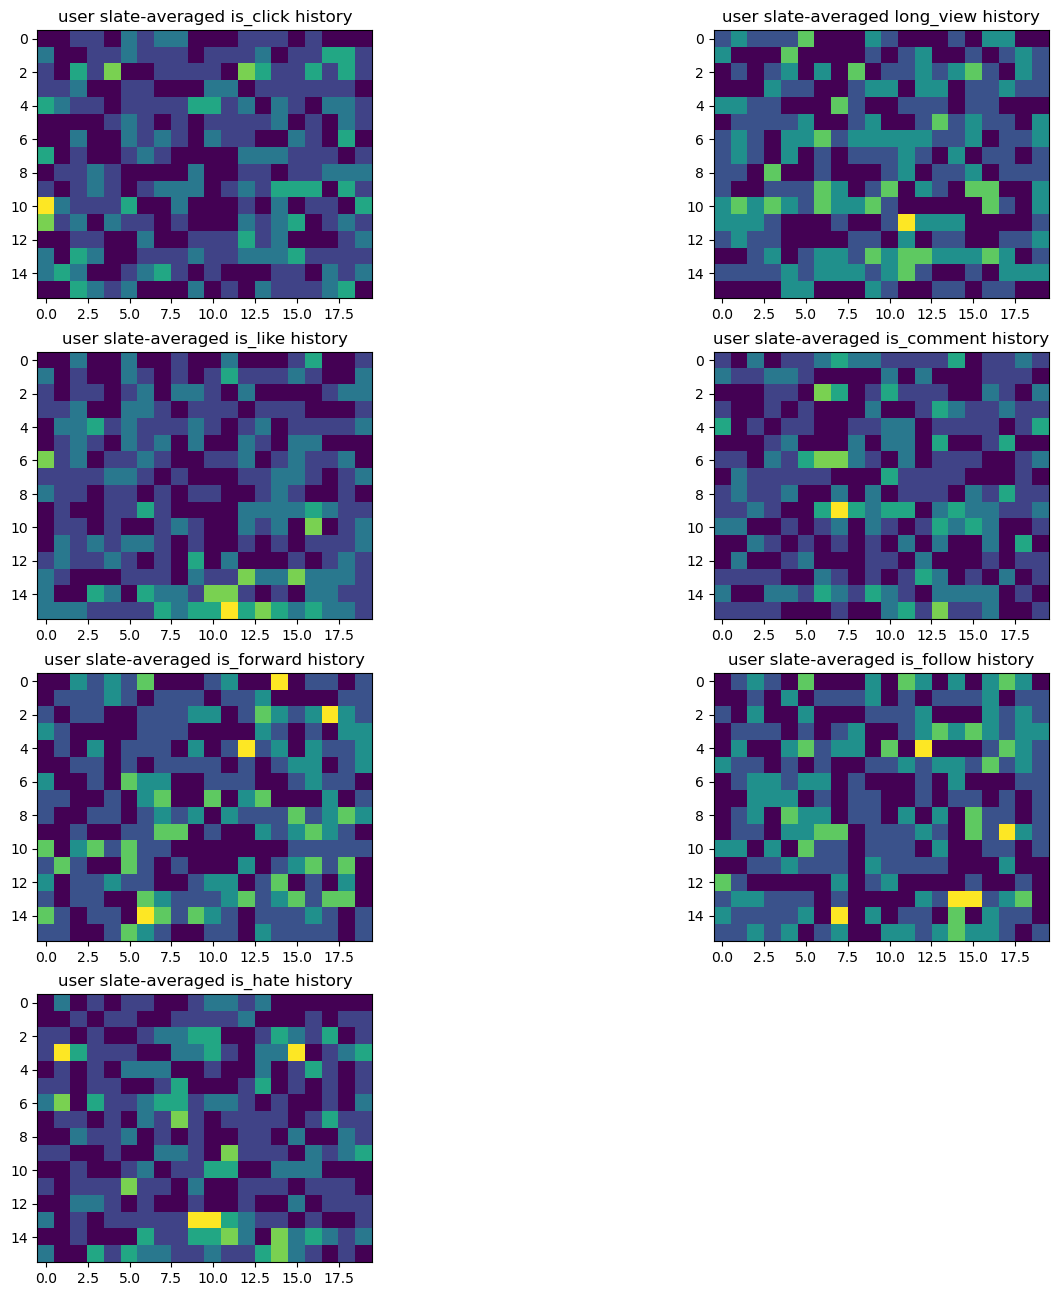

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# selected_feedbacks = ['is_click', 'long_view', 'is_forward']
selected_feedbacks = env.response_types
n_row = (len(selected_feedbacks)+1)//2
plt.figure(figsize = (16,4*n_row))
print('list of feedbacks: ', selected_feedbacks)
for i,f in enumerate(selected_feedbacks):
    H = np.transpose(np.array(feedback_history[f]))
    plt.subplot(n_row,2,i+1)
    plt.imshow(H)
    plt.title(f'user slate-averaged {f} history')
plt.show()

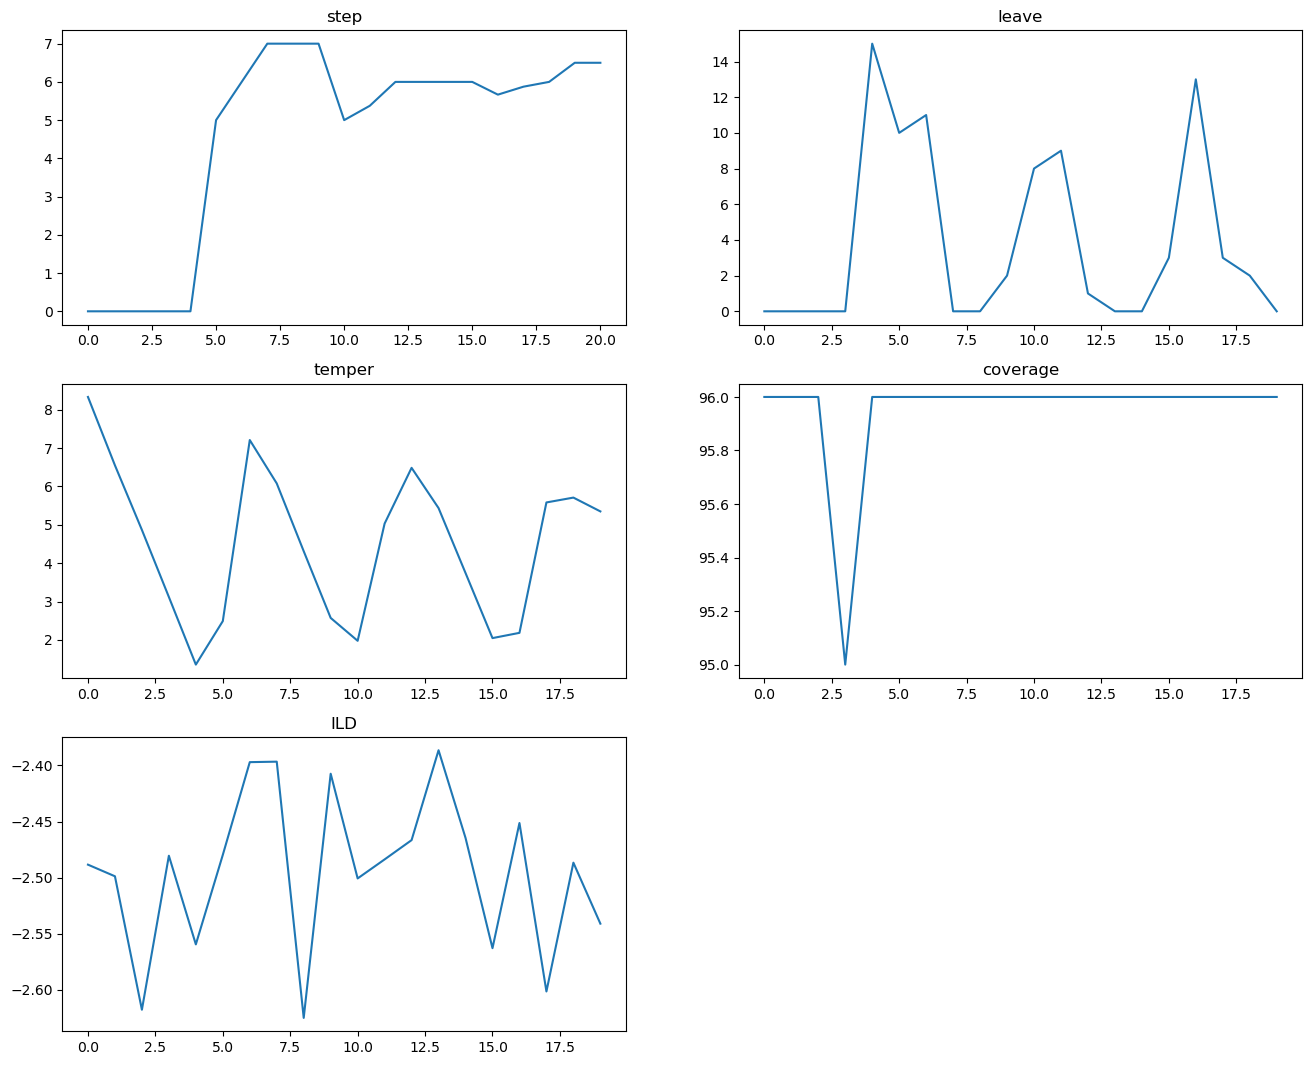

In [7]:
env_observation_list = ['step', 'leave', 'temper', 'coverage', 'ILD']
n_row = (len(env_observation_list)+1)//2
plt.figure(figsize = (16, 1+4*n_row))
for i,k in enumerate(env_observation_list):
    plt.subplot(n_row,2, i+1)
    plt.plot(env.env_history[k])
    plt.title(k)
plt.show()

### Example of User Response

In [8]:
user_feedback.keys()

dict_keys(['immediate_response', 'user_state', 'coverage', 'ILD', 'done'])

In [9]:
user_feedback['user_state'].shape

torch.Size([16, 1, 192])

In [10]:
print('coverage:', user_feedback['coverage'])
print('intra list diversity:', user_feedback['ILD'])
print('done signal:', user_feedback['done'])

coverage: 96
intra list diversity: -2.3537235260009766
done signal: tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False])


In [14]:
# (episode_batch_size, slate_size, n_response_types)
print(user_feedback['immediate_response'].shape)
print(user_feedback['immediate_response'])

torch.Size([16, 6, 7])
tensor([[[0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 1., 0., 1.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1.],
         [1., 0., 0., 0., 1., 0., 0.]],

        [[0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 1.],
         [0., 0., 0., 1., 1., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[1., 1., 0., 0., 0., 1.,

In [13]:
action.shape, action

(torch.Size([16, 6]),
 tensor([[14831,  8225, 26028, 16915, 21748,   177],
         [17789, 16211, 16658, 10346, 17010, 11224],
         [ 9673, 20483, 22402,  1312, 28095, 25560],
         [15396, 12542,  9522,  3446, 13958, 31033],
         [24590, 31225, 29186, 30276, 15066,  7540],
         [21072, 16583, 22054, 29555, 17613,  4620],
         [18202,  8979, 21730,  3546, 30977,  2123],
         [ 1591,  6620, 21541,  9148, 23733, 19454],
         [26801, 22242,  3952, 18250,  1565,  5362],
         [ 3057,  9795, 14194,  7890,  7135, 29534],
         [12791, 31140, 31234, 26882,    62, 23034],
         [ 2172, 27373, 21660, 11971, 10262, 10257],
         [ 5818, 25389, 29931,  7022, 10514,  4193],
         [ 8592, 26607, 30848, 19319, 14891, 12298],
         [ 8725, 23427, 20854, 25431, 16636, 27090],
         [22594, 23425,  2754,  6515, 20453,  8864]]))